In [255]:
import numpy as np
import matplotlib.pyplot as plt
import SQcircuit as sq
import Modules.SQcircuit_extensions as sq_ext
from scipy.optimize import curve_fit, minimize

import pickle
import os
import importlib
importlib.reload(sq_ext)

data_dir = r'/data'
opt_dir = r'/opt_results/'

# Qubit 1

In [232]:
experiment_name = 'qubit_1'


### Load data

In [233]:
with open(os.getcwd() + data_dir + r'/x__q1_tt_low_q1.pkl', 'rb') as f:
    x__q1_tt_low = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/y__q1_tt_low_q1.pkl', 'rb') as f:
    y__q1_tt_low = pickle.load(f)[0]
    
with open(os.getcwd() + data_dir + r'/x__q1_tt_up_q1.pkl', 'rb') as f:
    x__q1_tt_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'/y__q1_tt_up_q1.pkl', 'rb') as f:
    y__q1_tt_up = pickle.load(f)

Anzahl_Perioden = 2
I_ss_low__fs = -0.00375
I_ss_up__fs = 0.00267
I0_q1 = (I_ss_up__fs - I_ss_low__fs)/Anzahl_Perioden    
I_ss__q1_tt_low = 1e-5

x__q1_tt = np.concatenate([x__q1_tt_low, x__q1_tt_up])
y__q1_tt = np.concatenate([y__q1_tt_low, y__q1_tt_up])
phi_q1_tt = (x__q1_tt - I_ss__q1_tt_low + I0_q1/2  ) /I0_q1

φ_ext_exp = phi_q1_tt
ω_vs_φ_ext_exp = y__q1_tt

## Define cost function

In [228]:
def qubit_spectrum(free_args, fixed_args, out='error'):
    CF, LF, EJ = free_args
    φ_ext_exp, ω_vs_φ_ext_exp = fixed_args
    # φ_ext_values = phi_q1_tt
    fluxonium = sq_ext.sq_fluxonium(C_F_eff=CF, L_F_eff=LF, EJ=EJ)
    loop  = fluxonium.loops[0]
    ω_vs_φ_ext = np.zeros(len(φ_ext_exp))
    
    for i, φ_ext in enumerate(φ_ext_exp):
        loop.set_flux(φ_ext)
        fluxonium.diag(2)
        ω_vs_φ_ext[i] = fluxonium.efreqs[1]-fluxonium.efreqs[0]
    
    if out == 'error':
        return np.sum((ω_vs_φ_ext * 1e9 - ω_vs_φ_ext_exp)**2)
    elif out == 'spectrum':
        return ω_vs_φ_ext * 1e9 

## Guess parameters and set bounds

In [245]:
CR_1, CF_1, LF_1, LR_1, EJ_1, Δ_1, ω_r_1 = sq_ext.get_experimental_parameters('qubit 1', Δ=0.1, LR=100)
free_args_guess = [CF_1, LF_1, EJ_1]
bounds = ((20,30), (20,30), (4,15))
fixed_args = ([φ_ext_exp, ω_vs_φ_ext_exp])

## Plot guess to check

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

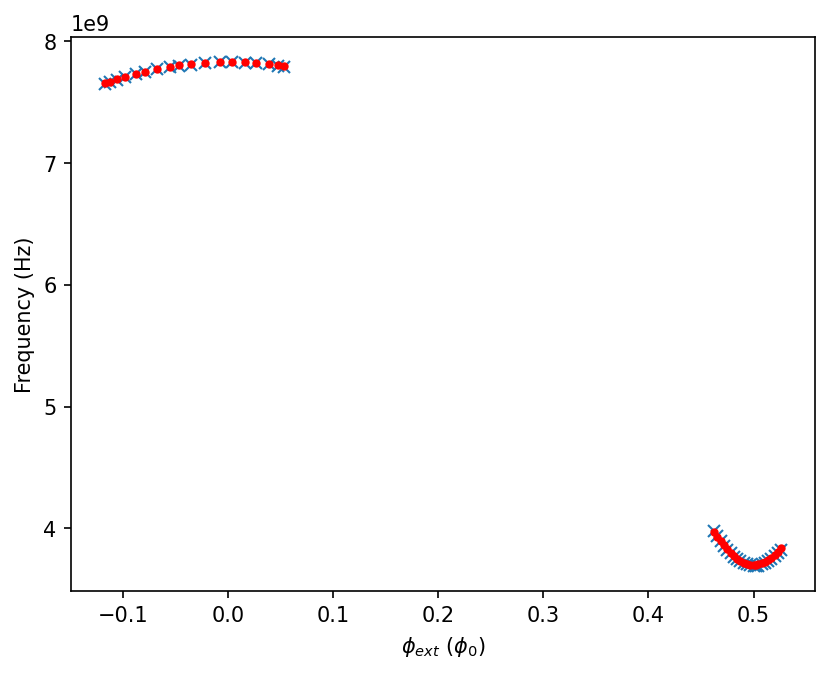

In [231]:
ω_qubit_1_vs_φ_ext_guess = qubit_spectrum(free_args_guess, fixed_args, out='spectrum')
fig, ax1 = plt.subplots(dpi=150)
ax1.plot(φ_ext_exp, ω_vs_φ_ext_exp, 'x')
ax1.plot(φ_ext_exp, ω_qubit_1_vs_φ_ext_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')


## Optimize or load previous optimization

In [275]:
load = True

experiment_file = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    data = np.load(experiment_file)
    free_args_opt   = data['free_args_opt']
    free_args_guess = data['free_args_guess']
    fixed_args      = (data['fixed_args'])
    bounds          = (data['bounds'])
else:
    free_args_opt = minimize(qubit_spectrum, free_args_guess, fixed_args, bounds=bounds).x
    np.savez(experiment_file, free_args_opt=free_args_opt, free_args_guess = np.array(free_args_guess), fixed_args=np.array(fixed_args), bounds=np.array(bounds))
    

## Plot fits and errors

In [276]:
ω_vs_φ_ext_guess = qubit_spectrum(free_args_guess, fixed_args,  out = 'spectrum')
ω_vs_φ_ext_opt   = qubit_spectrum(free_args_opt  , fixed_args,  out = 'spectrum')

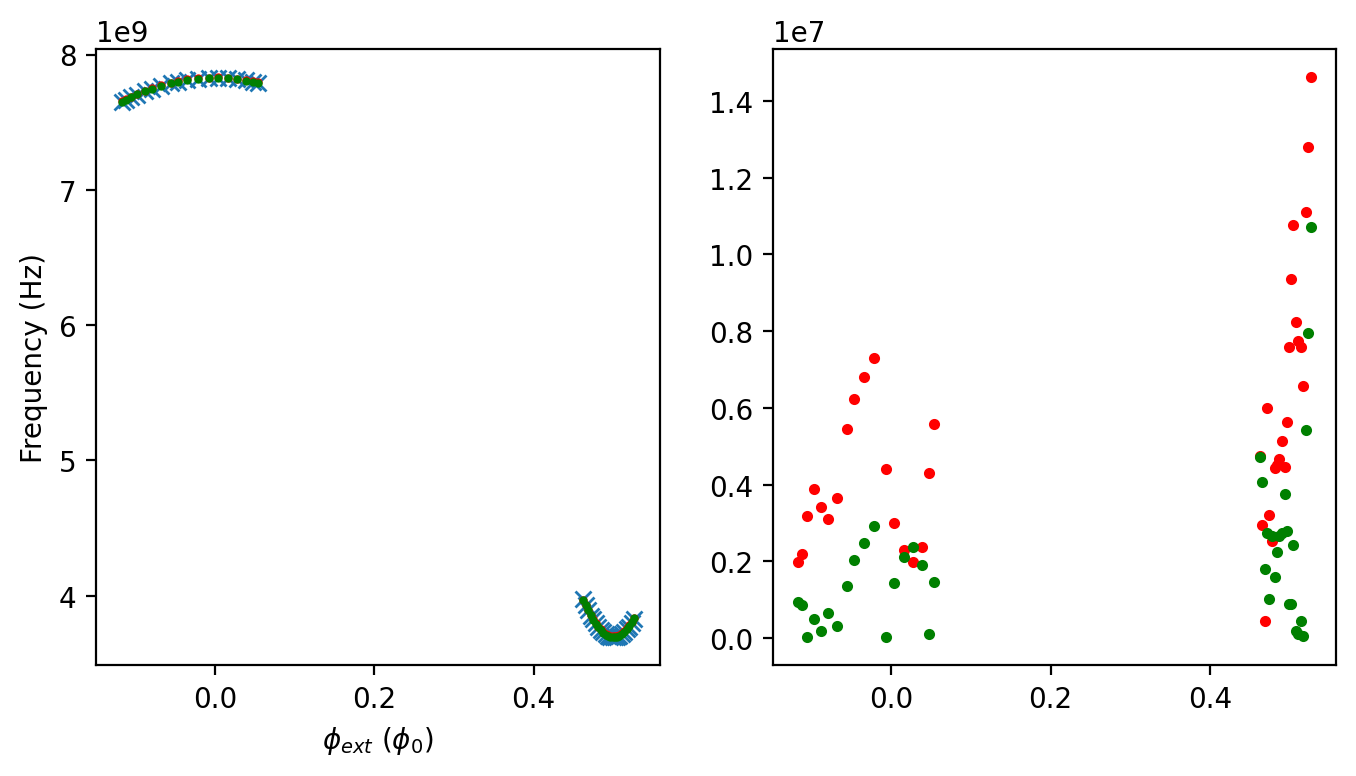

In [277]:
fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_vs_φ_ext_exp, 'x')
ax1.plot(φ_ext_exp, ω_vs_φ_ext_guess, 'r.', markersize=4)
ax1.plot(φ_ext_exp, ω_vs_φ_ext_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_exp, np.abs(ω_vs_φ_ext_guess-ω_vs_φ_ext_exp), 'r.')
ax2.plot(φ_ext_exp, np.abs(ω_vs_φ_ext_opt-ω_vs_φ_ext_exp), 'g.')

# Qubit 1 [Single cooldown day 1]

In [232]:
experiment_name = 'qubit_1_single_1'


### Load data

In [521]:
with open(os.getcwd() + data_dir + r'/mw_freq__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    mw_freq__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current__tt_q1_single_circuit_1_up.pkl', 'rb') as f: 
    current__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'/phase__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    phase__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current_extracted__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'/mw_freq_extracted__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_1_up = pickle.load(f)

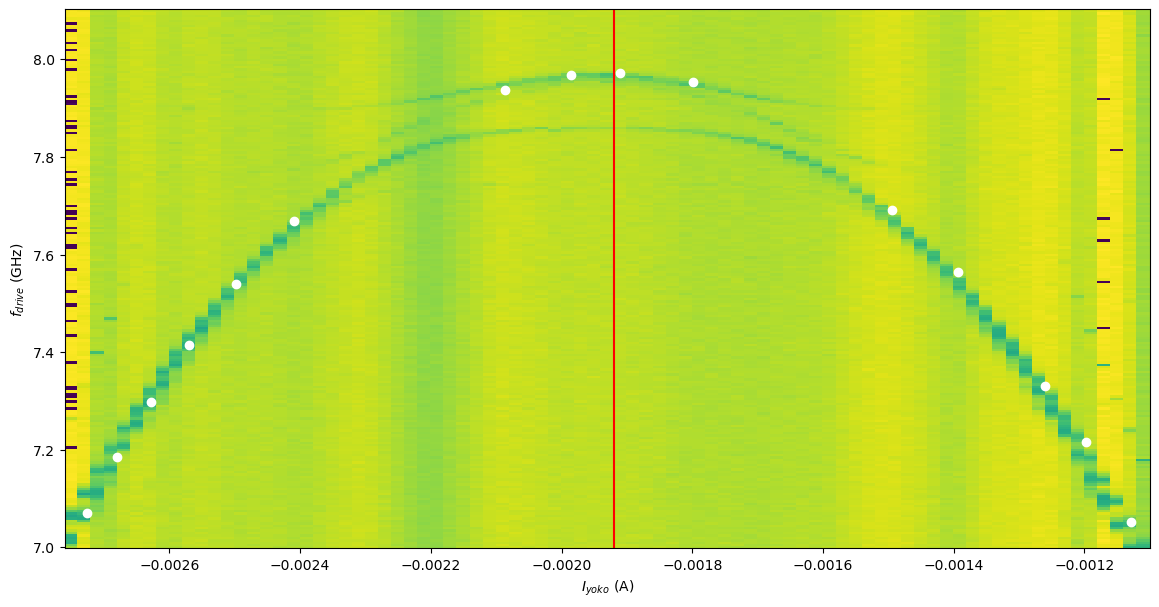

In [522]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__tt_q1_single_circuit_1_up, mw_freq__tt_q1_single_circuit_1_up*1e-9, phase__tt_q1_single_circuit_1_up[:,:,2].T)
ax.plot(current_extracted__tt_q1_single_circuit_1_up, mw_freq_extracted__tt_q1_single_circuit_1_up*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

ax.axvline(-0.00192, color = 'red')

plt.show()

In [523]:
with open(os.getcwd() + data_dir + r'/mw_freq__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    mw_freq__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    current__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'/phase__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    phase__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current_extracted__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'/mw_freq_extracted__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_1_down = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/home/gabriel/PycharmProjects/tunable-capacitive-coupling-flux-qubits/KIT/spectral_data_KIT/data/current_extracted__tt_q1_single_circuit_1_down.pkl'

NameError: name 'current_extracted__tt_q1_single_circuit_1_down' is not defined

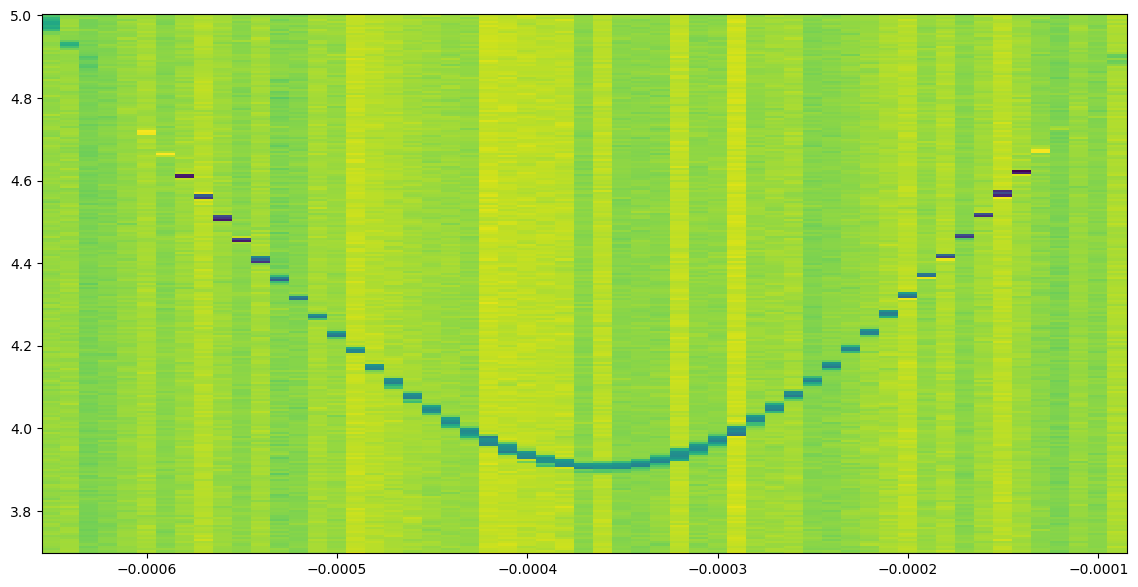

In [525]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__tt_q1_single_circuit_1_down, mw_freq__tt_q1_single_circuit_1_down*1e-9, phase__tt_q1_single_circuit_1_down[:,:,2].T)
ax.plot(current_extracted__tt_q1_single_circuit_1_down, mw_freq_extracted__tt_q1_single_circuit_1_down*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

Iss = -0.000355
ax.axvline(Iss, color = 'red')


plt.show()

In [526]:
current_extracted__tt_q1_single_circuit_1 = np.concatenate([current_extracted__tt_q1_single_circuit_1_down, current_extracted__tt_q1_single_circuit_1_up])
mw_freq_extracted__tt_q1_single_circuit_1 = np.concatenate([mw_freq_extracted__tt_q1_single_circuit_1_down, mw_freq_extracted__tt_q1_single_circuit_1_up])

phase__tt_q1_single_circuit_1  = (current_extracted__tt_q1_single_circuit_1 - Iss + I0/2)/I0

NameError: name 'current_extracted__tt_q1_single_circuit_1_down' is not defined

NameError: name 'phase__tt_q1_single_circuit_1' is not defined

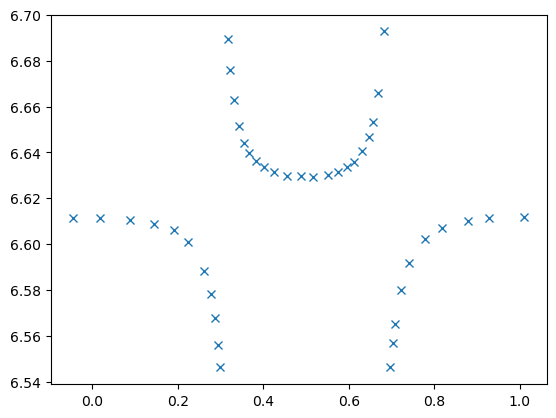

In [527]:
plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 'x', label = 'resonator')
plt.plot(phase__tt_q1_single_circuit_1, mw_freq_extracted__tt_q1_single_circuit_1*1e-9, 'x', label = 'qubit')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.legend()

## Define cost function

In [228]:
def qubit_spectrum(free_args, fixed_args, out='error'):
    CF, LF, EJ = free_args
    φ_ext_exp, ω_vs_φ_ext_exp = fixed_args
    # φ_ext_values = phi_q1_tt
    fluxonium = sq_ext.sq_fluxonium(C_F_eff=CF, L_F_eff=LF, EJ=EJ)
    loop  = fluxonium.loops[0]
    ω_vs_φ_ext = np.zeros(len(φ_ext_exp))
    
    for i, φ_ext in enumerate(φ_ext_exp):
        loop.set_flux(φ_ext)
        fluxonium.diag(2)
        ω_vs_φ_ext[i] = fluxonium.efreqs[1]-fluxonium.efreqs[0]
    
    if out == 'error':
        return np.sum((ω_vs_φ_ext * 1e9 - ω_vs_φ_ext_exp)**2)
    elif out == 'spectrum':
        return ω_vs_φ_ext * 1e9 

## Guess parameters and set bounds

In [245]:
CR_1, CF_1, LF_1, LR_1, EJ_1, Δ_1, ω_r_1 = sq_ext.get_experimental_parameters('qubit 1', Δ=0.1, LR=100)
free_args_guess = [CF_1, LF_1, EJ_1]
bounds = ((20,30), (20,30), (4,15))
fixed_args = ([φ_ext_exp, ω_vs_φ_ext_exp])

## Plot guess to check

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

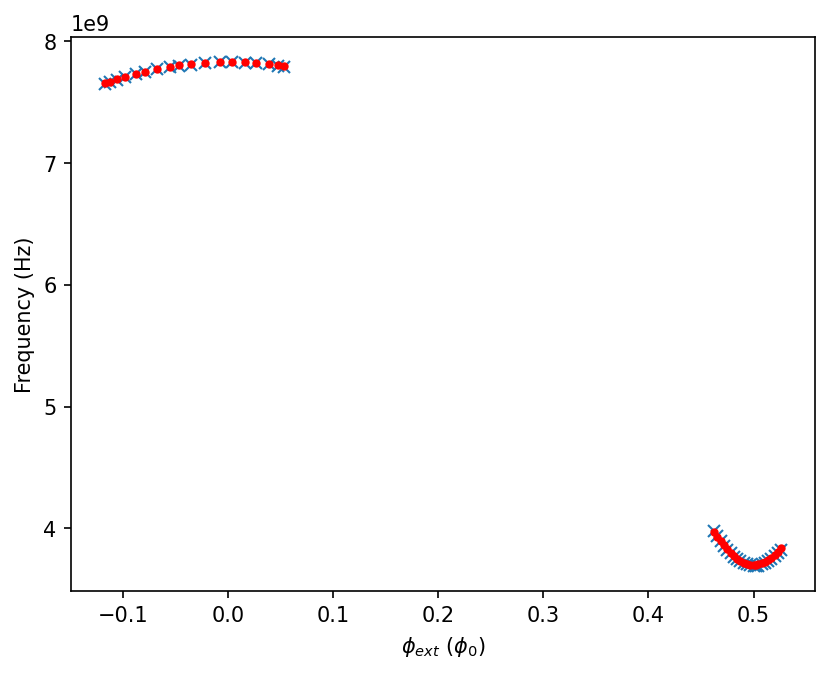

In [231]:
ω_qubit_1_vs_φ_ext_guess = qubit_spectrum(free_args_guess, fixed_args, out='spectrum')
fig, ax1 = plt.subplots(dpi=150)
ax1.plot(φ_ext_exp, ω_vs_φ_ext_exp, 'x')
ax1.plot(φ_ext_exp, ω_qubit_1_vs_φ_ext_guess, 'r.')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel(r'$\phi_{ext}$ ($\phi_0$)')


## Optimize or load previous optimization

In [275]:
load = True

experiment_file = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    data = np.load(experiment_file)
    free_args_opt   = data['free_args_opt']
    free_args_guess = data['free_args_guess']
    fixed_args      = (data['fixed_args'])
    bounds          = (data['bounds'])
else:
    free_args_opt = minimize(qubit_spectrum, free_args_guess, fixed_args, bounds=bounds).x
    np.savez(experiment_file, free_args_opt=free_args_opt, free_args_guess = np.array(free_args_guess), fixed_args=np.array(fixed_args), bounds=np.array(bounds))
    

## Plot fits and errors

In [276]:
ω_vs_φ_ext_guess = qubit_spectrum(free_args_guess, fixed_args,  out = 'spectrum')
ω_vs_φ_ext_opt   = qubit_spectrum(free_args_opt  , fixed_args,  out = 'spectrum')

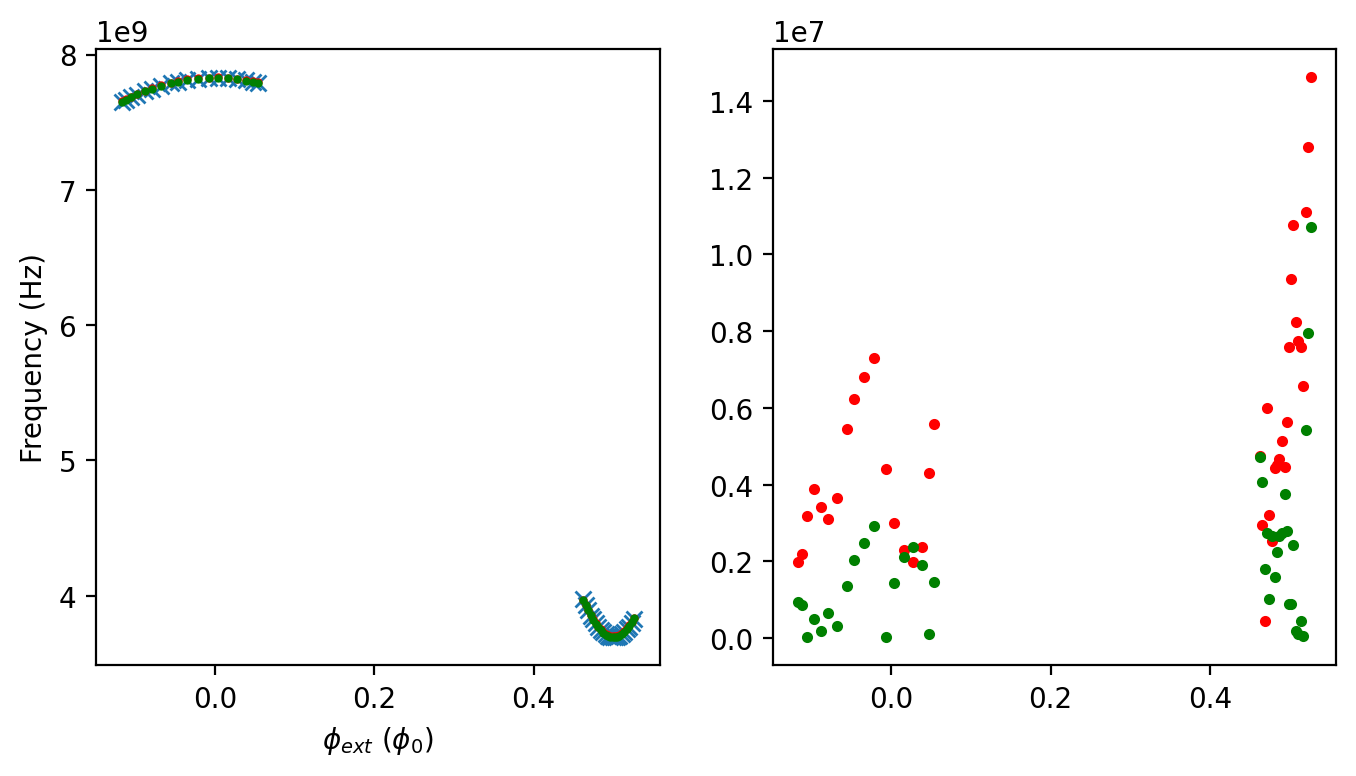

In [277]:
fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_vs_φ_ext_exp, 'x')
ax1.plot(φ_ext_exp, ω_vs_φ_ext_guess, 'r.', markersize=4)
ax1.plot(φ_ext_exp, ω_vs_φ_ext_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_exp, np.abs(ω_vs_φ_ext_guess-ω_vs_φ_ext_exp), 'r.')
ax2.plot(φ_ext_exp, np.abs(ω_vs_φ_ext_opt-ω_vs_φ_ext_exp), 'g.')

# Qubit 1 - Resonator 1 avoided level crossing

In [375]:
experiment_name = 'qubit_1_resonator_1_avoided_level_crossing'

### Load data

In [280]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_q1_coil1.pkl', 'rb') as f:
    f_vna__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/current__fs_q1_coil1.pkl', 'rb') as f:
    current__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/phase__fs_q1_coil1.pkl', 'rb') as f:
    phase__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/current__fres_q1_coil1.pkl', 'rb') as f:
    current_q1_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/fres__fres_q1_coil1.pkl', 'rb') as f:
    fres_q1_coil1 = pickle.load(f)
    
current_q1_coil1 = np.concatenate([current_q1_coil1[0], current_q1_coil1[1], current_q1_coil1[2]])
fres_q1_coil1 = np.concatenate([fres_q1_coil1[0], fres_q1_coil1[1], fres_q1_coil1[2]])
I_ss__q1_fs = 1.12*1e-5
phi_q1_coil1 = (current_q1_coil1 - I_ss__q1_fs + I0_q1 / 2) / I0_q1

φ_ext_exp = phi_q1_coil1
ω_vs_φ_ext_exp = fres_q1_coil1

## Define cost function

In [306]:
def r_q_av_cross_spectrum(free_args, fixed_args, out='error'):
    CR, LR, EJ, Δ, C_int = free_args
    φ_ext_exp, ω_vs_φ_ext_exp, CF, LF = fixed_args
    Lq, Lr = sq_ext.LF_LR_eff_to_Lq_Lr(LF=LF_1,LR=LR,Δ=Δ)

    resonator = sq_ext.sq_resonator(C_R_eff=CR, L_R_eff=LR)
    qubit = sq_ext.sq_fluxonium(C_F_eff=CF, L_F_eff=LF, EJ=EJ)
    loop  = qubit.loops[0]

    ω_vs_φ_ext = np.zeros([len(φ_ext_exp),2])
    for i, φ_ext in enumerate(φ_ext_exp):
        loop.set_flux(φ_ext)
        H = sq_ext.hamiltonian_qubit(fluxonium=qubit, resonator=resonator, Lq=Lq, Lr=Lr, Δ=Δ, C_int=C_int )
        ω_vs_φ_ext[i] = sq_ext.diag(H, 3, remove_ground=True)[0][1:]
    ω_vs_φ_ext = np.concatenate( [ω_vs_φ_ext[0:13,0] , ω_vs_φ_ext[13:-10,1], ω_vs_φ_ext[-10:,0]]) * 1e9 
    
    if out == 'error':
        return np.sum((ω_vs_φ_ext - ω_vs_φ_ext_exp)**2)
    elif out =='spectrum':
        return ω_vs_φ_ext 

## Guess parameters and set bounds

In [307]:
_, CF_1, LF_1, _, _, _, _ = sq_ext.get_experimental_parameters('qubit 1', Δ=0.1, LR=100)

experiment_file = os.getcwd() + opt_dir + 'qubit_1' + '.npz'
data = np.load(experiment_file)
EJ = data['free_args_opt'][-1]

Δ=0.7
LR = 100
C_int = 370
CR, _, _, _, _, _, _ = sq_ext.get_experimental_parameters('qubit 1', Δ=Δ, LR=LR)
CR-=0.05
LR-=0.3
free_args_guess = [CR, LR, EJ, Δ, C_int]
fixed_args = ([φ_ext_exp, ω_vs_φ_ext_exp, CF_1, LF_1 ])
bounds= ((2,25),(30,170),(4,15),(0,1),(10,1000))

## Plot guess to check

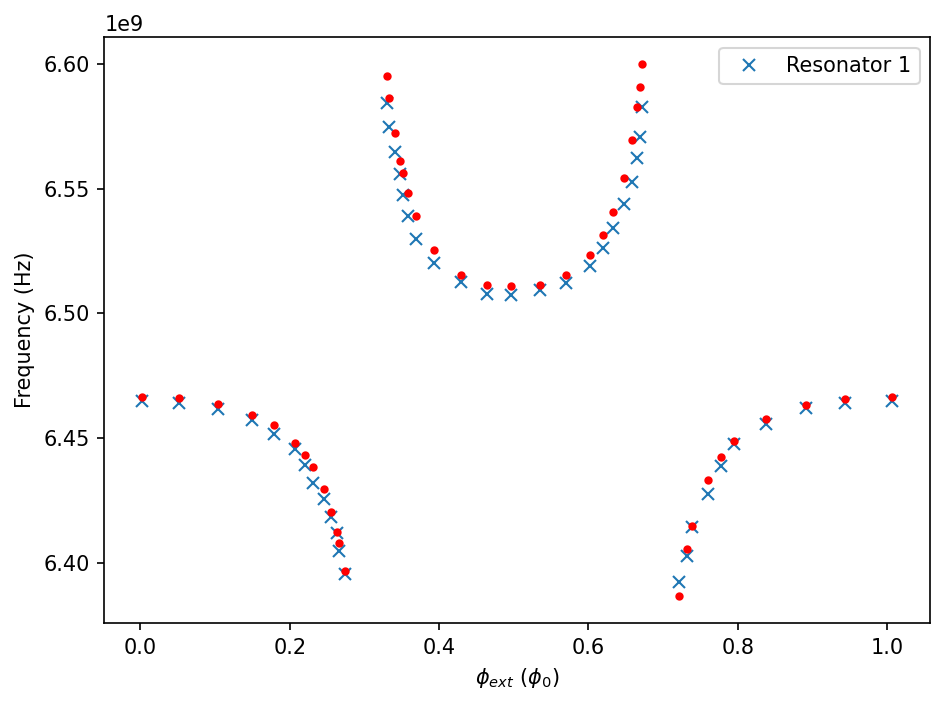

In [308]:
ω_vs_φ_ext_guess = r_q_av_cross_spectrum(free_args_guess, fixed_args, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_vs_φ_ext_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_exp, ω_vs_φ_ext_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Optimize or load previous optimization

In [376]:
load = True
experiment_name = 'qubit_1_resonator_1_avoided_level_crossing'

experiment_file = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    data = np.load(experiment_file)
    free_args_opt   = data['free_args_opt']
    free_args_guess = data['free_args_guess']
    fixed_args      = (data['fixed_args_arr'], data['fixed_args_sc'])
    bounds          = (data['bounds'])
else:
    free_args_opt = minimize(r_q_av_cross_spectrum, free_args_guess, fixed_args, bounds=bounds).x
    np.savez(experiment_file, free_args_opt=free_args_opt, free_args_guess = np.array(free_args_guess), fixed_args_arr=np.array(fixed_args[0:2]), 
             fixed_args_sc=np.array(fixed_args[2:]), bounds=np.array(bounds))
    

## Plot fits and errors

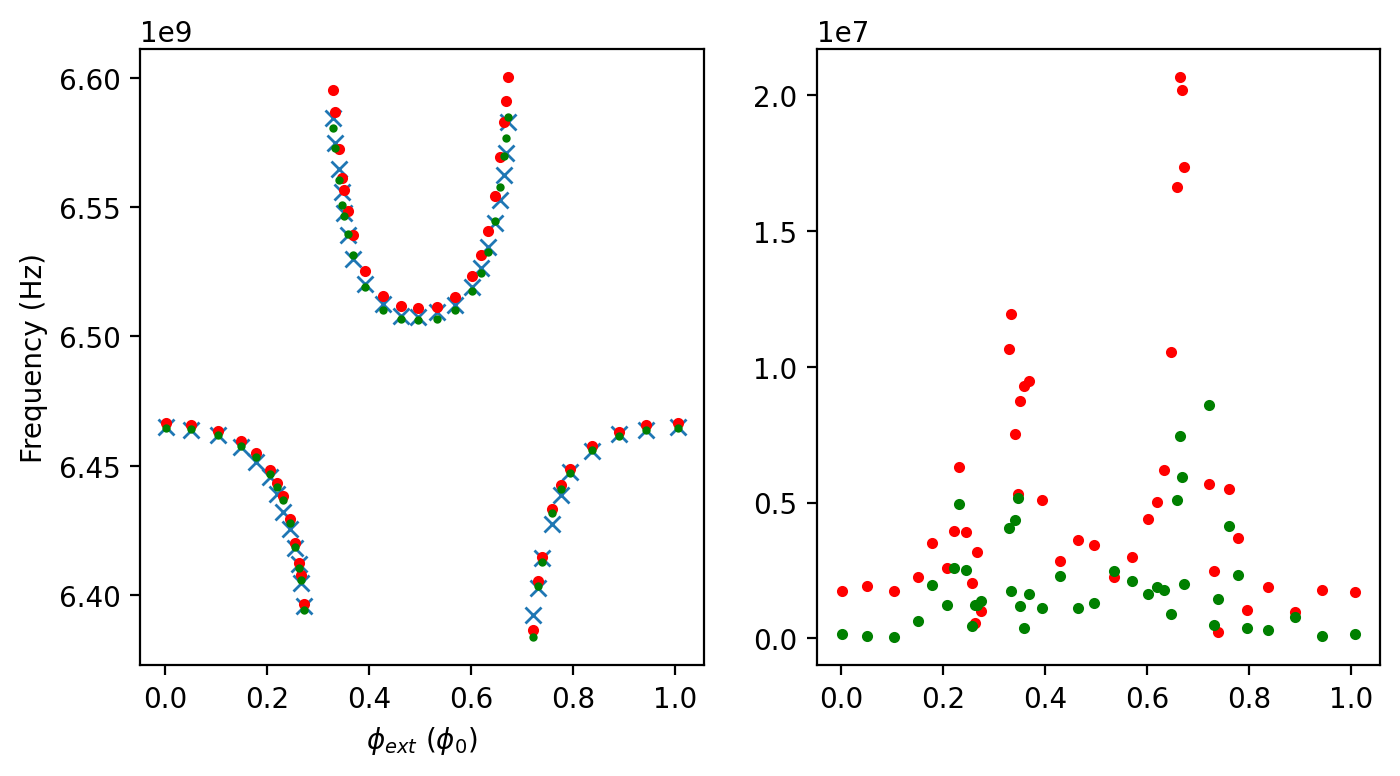

In [315]:
ω_vs_φ_ext_opt = r_q_av_cross_spectrum(free_args_opt, fixed_args, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_vs_φ_ext_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_exp, ω_vs_φ_ext_guess, '.r')
ax1.plot(φ_ext_exp, ω_vs_φ_ext_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_exp, np.abs(ω_vs_φ_ext_guess - ω_vs_φ_ext_exp), 'r.')
ax2.plot(φ_ext_exp, np.abs(ω_vs_φ_ext_opt   - ω_vs_φ_ext_exp), 'g.')

# Qubit 1 - Resonator 1 avoided level crossing [Single circuit cooldown 1]

In [512]:
experiment_name = 'qubit_1_resonator_1_avoided_level_crossing_single_circuit_1'

### Load data

In [513]:
with open(os.getcwd() + data_dir + r'/current_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    current_q1_single_circuit_1_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'/freq_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    freq_q1_single_circuit_1_crossings = pickle.load(f)
I0 = (0.008275 + 0.007575)/5
Iss = -0.00035
phase_q1_crossings_CD1 = (current_q1_single_circuit_1_crossings - Iss + I0/2)/I0
φ_ext_exp = phase_q1_crossings_CD1
ω_vs_φ_ext_exp = freq_q1_single_circuit_1_crossings

## Define cost function

In [514]:
def r_q_av_cross_single_spectrum(free_args, fixed_args, out='error'):
    CR, LR, EJ, Δ = free_args
    φ_ext_exp, ω_vs_φ_ext_exp, CF, LF, crossing_index_1, crossing_index_2 = fixed_args
    Lq, Lr = sq_ext.LF_LR_eff_to_Lq_Lr(LF=LF_1,LR=LR,Δ=Δ)

    resonator = sq_ext.sq_resonator(C_R_eff=CR, L_R_eff=LR)
    qubit = sq_ext.sq_fluxonium(C_F_eff=CF, L_F_eff=LF, EJ=EJ)
    loop  = qubit.loops[0]

    ω_vs_φ_ext = np.zeros([len(φ_ext_exp),2])
    for i, φ_ext in enumerate(φ_ext_exp):
        loop.set_flux(φ_ext)
        H = sq_ext.hamiltonian_qubit(fluxonium=qubit, resonator=resonator, Lq=Lq, Lr=Lr, Δ=Δ )
        ω_vs_φ_ext[i] = sq_ext.diag(H, 3, remove_ground=True)[0][1:]
    ω_vs_φ_ext = np.concatenate( [ω_vs_φ_ext[0:crossing_index_1,0] , ω_vs_φ_ext[crossing_index_1:-crossing_index_2,1], ω_vs_φ_ext[-crossing_index_2:,0]]) * 1e9 
    
    if out == 'error':
        return np.sum((ω_vs_φ_ext - ω_vs_φ_ext_exp)**2)
    elif out =='spectrum':
        return ω_vs_φ_ext 

## Guess parameters and set bounds

In [515]:
_, CF_1, LF_1, _, _, _, _ = sq_ext.get_experimental_parameters('qubit 1', Δ=0.1, LR=100)

# experiment_file = os.getcwd() + opt_dir + 'qubit_1' + '.npz'
# data = np.load(experiment_file)
# EJ = data['free_args_opt'][-1]
EJ = 6.24
Δ = 0.8
LR = 95
CR = 6.07

In [516]:
crossing_index_1 = 11
crossing_index_2 = 10
free_args_guess = [CR, LR, EJ, Δ]
fixed_args = ([φ_ext_exp, ω_vs_φ_ext_exp, CF_1, LF_1,crossing_index_1, crossing_index_2 ])
bounds= ((2,25),(30,170),(4,15),(0,2))

## Plot guess to check

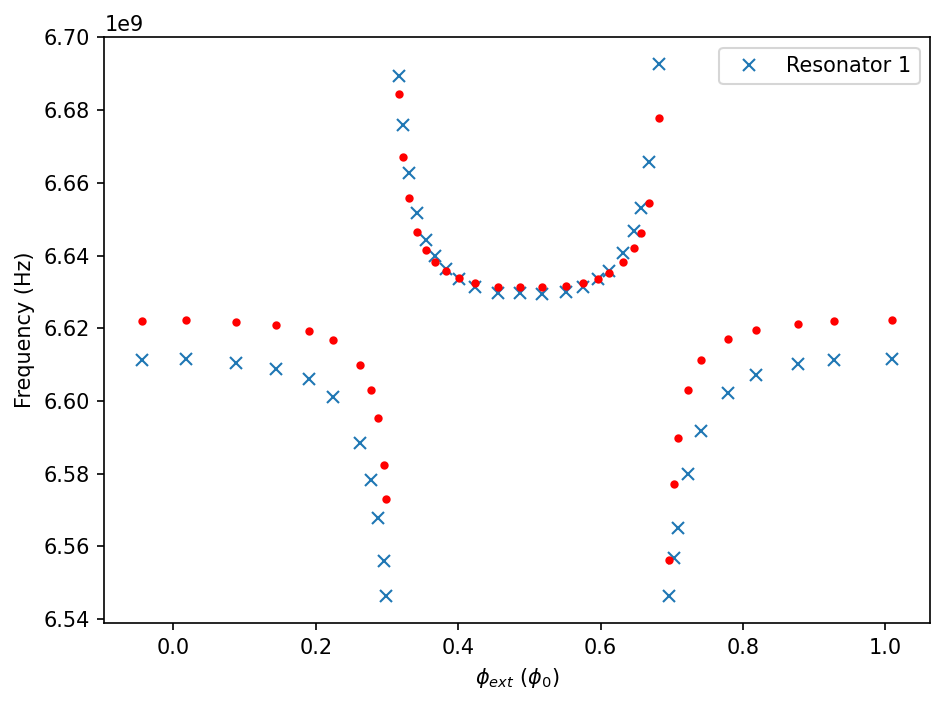

In [517]:
ω_vs_φ_ext_guess = r_q_av_cross_single_spectrum(free_args_guess, fixed_args, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_vs_φ_ext_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_exp, ω_vs_φ_ext_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Optimize or load previous optimization

In [518]:
load = False

experiment_name = 'qubit_1_resonator_1_avoided_level_crossing_single_circuit_1'
experiment_file = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    data = np.load(experiment_file)
    free_args_opt   = data['free_args_opt']
    free_args_guess = data['free_args_guess']
    fixed_args      = (data['fixed_args_arr'], data['fixed_args_sc'])
    bounds          = (data['bounds'])
else:
    free_args_opt = minimize(r_q_av_cross_single_spectrum, free_args_guess, fixed_args, bounds=bounds).x
    np.savez(experiment_file, free_args_opt=free_args_opt, free_args_guess = np.array(free_args_guess), fixed_args_arr=np.array(fixed_args[0:2]), 
             fixed_args_sc=np.array(fixed_args[2:]), bounds=np.array(bounds))
    

In [519]:
free_args_opt

array([ 6.07828337, 95.05794044,  6.24056888,  0.99983018])

## Plot fits and errors

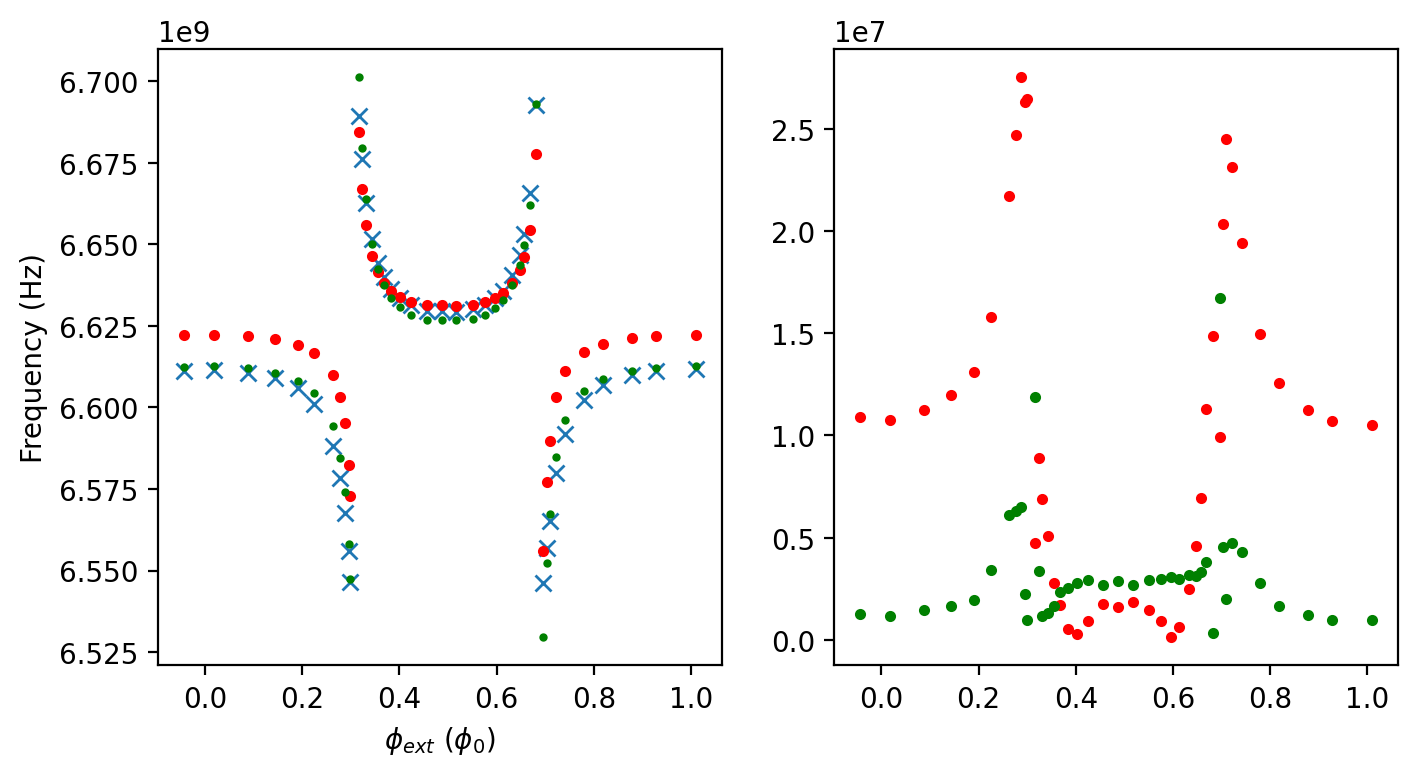

In [485]:
ω_vs_φ_ext_opt = r_q_av_cross_single_spectrum(free_args_opt, fixed_args, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_vs_φ_ext_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_exp, ω_vs_φ_ext_guess, '.r')
ax1.plot(φ_ext_exp, ω_vs_φ_ext_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_exp, np.abs(ω_vs_φ_ext_guess - ω_vs_φ_ext_exp), 'r.')
ax2.plot(φ_ext_exp, np.abs(ω_vs_φ_ext_opt   - ω_vs_φ_ext_exp), 'g.')

# Qubit 1 - Resonator 1 avoided level crossing [Single circuit cooldown 2]

In [335]:
experiment_name = 'qubit_1_resonator_1_avoided_level_crossing_single_circuit_2'

### Load data

In [494]:
with open(os.getcwd() + data_dir + r'/current_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    current_q1_single_circuit_2_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'/freq_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    freq_q1_single_circuit_2_crossings = pickle.load(f)
I0 = (0.00825 + 0.00762)/5
Iss = 0.0013
phase_q1_crossings_CD1 = (current_q1_single_circuit_2_crossings - Iss + I0/2)/I0
φ_ext_exp = phase_q1_crossings_CD1
ω_vs_φ_ext_exp = freq_q1_single_circuit_2_crossings

## Define cost function

In [495]:
def r_q_av_cross_single_spectrum(free_args, fixed_args, out='error'):
    CR, LR, EJ, Δ = free_args
    φ_ext_exp, ω_vs_φ_ext_exp, CF, LF, crossing_index_1, crossing_index_2 = fixed_args
    Lq, Lr = sq_ext.LF_LR_eff_to_Lq_Lr(LF=LF_1,LR=LR,Δ=Δ)

    resonator = sq_ext.sq_resonator(C_R_eff=CR, L_R_eff=LR)
    qubit = sq_ext.sq_fluxonium(C_F_eff=CF, L_F_eff=LF, EJ=EJ)
    loop  = qubit.loops[0]

    ω_vs_φ_ext = np.zeros([len(φ_ext_exp),2])
    for i, φ_ext in enumerate(φ_ext_exp):
        loop.set_flux(φ_ext)
        H = sq_ext.hamiltonian_qubit(fluxonium=qubit, resonator=resonator, Lq=Lq, Lr=Lr, Δ=Δ )
        ω_vs_φ_ext[i] = sq_ext.diag(H, 3, remove_ground=True)[0][1:]
    ω_vs_φ_ext = np.concatenate( [ω_vs_φ_ext[0:crossing_index_1,0] , ω_vs_φ_ext[crossing_index_1:-crossing_index_2,1], ω_vs_φ_ext[-crossing_index_2:,0]]) * 1e9 
    
    if out == 'error':
        return np.sum((ω_vs_φ_ext - ω_vs_φ_ext_exp)**2)
    elif out =='spectrum':
        return ω_vs_φ_ext 

## Guess parameters and set bounds

In [496]:
_, CF_1, LF_1, _, _, _, _ = sq_ext.get_experimental_parameters('qubit 1', Δ=0.1, LR=100)

# experiment_file = os.getcwd() + opt_dir + 'qubit_1' + '.npz'
# data = np.load(experiment_file)
# EJ = data['free_args_opt'][-1]
EJ = 6.24
Δ = 0.8
LR = 95
CR = 6.07

In [500]:
crossing_index_1 = 10
crossing_index_2 = 10
free_args_guess = [CR, LR, EJ, Δ]
fixed_args = ([φ_ext_exp, ω_vs_φ_ext_exp, CF_1, LF_1,crossing_index_1, crossing_index_2 ])
bounds= ((2,25),(30,170),(4,15),(0,2))

## Plot guess to check

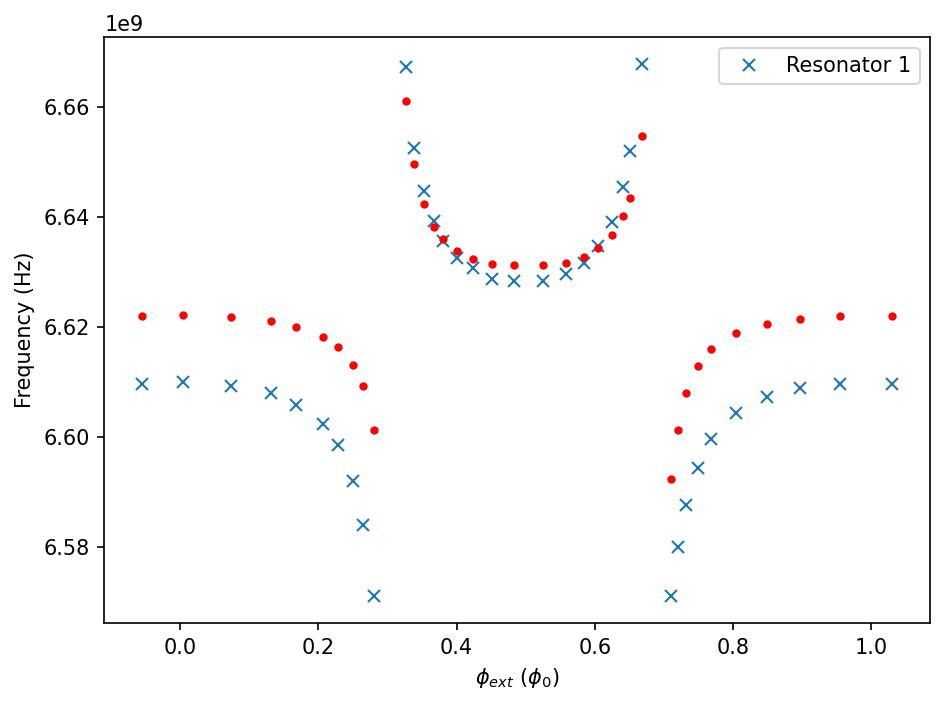

In [501]:
ω_vs_φ_ext_guess = r_q_av_cross_single_spectrum(free_args_guess, fixed_args, out='spectrum')

fig, ax = plt.subplots(dpi=150)
ax.plot(φ_ext_exp, ω_vs_φ_ext_exp, marker='x', ls='', label='Resonator 1')
ax.plot(φ_ext_exp, ω_vs_φ_ext_guess, '.r')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Optimize or load previous optimization

In [502]:
load = False

experiment_file = os.getcwd() + opt_dir + experiment_name + '.npz'
if load:
    data = np.load(experiment_file)
    free_args_opt   = data['free_args_opt']
    free_args_guess = data['free_args_guess']
    fixed_args      = (data['fixed_args_arr'], data['fixed_args'])
    bounds          = (data['bounds'])
else:
    free_args_opt = minimize(r_q_av_cross_single_spectrum, free_args_guess, fixed_args, bounds=bounds).x
    np.savez(experiment_file, free_args_opt=free_args_opt, free_args_guess = np.array(free_args_guess), fixed_args_arr=np.array(fixed_args[0:2]), 
             fixed_args_sc=np.array(fixed_args[2:]), bounds=np.array(bounds))
    

## Plot fits and errors

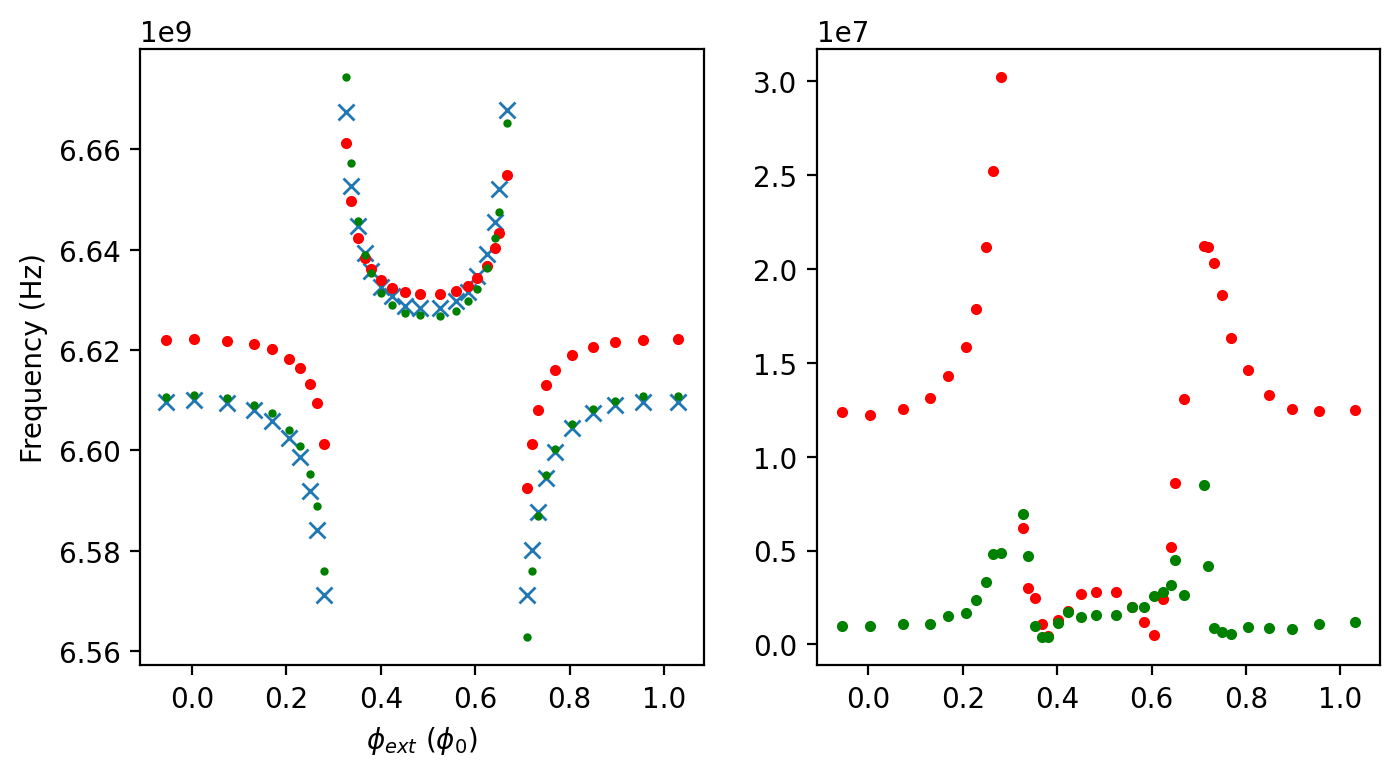

In [503]:
ω_vs_φ_ext_opt = r_q_av_cross_single_spectrum(free_args_opt, fixed_args, out='spectrum')

fig, (ax1, ax2 )= plt.subplots(ncols=2, dpi=200, figsize=[8,4])
ax1.plot(φ_ext_exp, ω_vs_φ_ext_exp, marker='x', ls='', label='Resonator 1')
ax1.plot(φ_ext_exp, ω_vs_φ_ext_guess, '.r')
ax1.plot(φ_ext_exp, ω_vs_φ_ext_opt, 'g.', markersize=4)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_xlabel('$\phi_{ext}$ ($\phi_0$)')

ax2.plot(φ_ext_exp, np.abs(ω_vs_φ_ext_guess - ω_vs_φ_ext_exp), 'r.')
ax2.plot(φ_ext_exp, np.abs(ω_vs_φ_ext_opt   - ω_vs_φ_ext_exp), 'g.')

In [504]:
free_args_opt

array([ 6.07788695, 95.07941178,  6.20080768,  1.06088475])

In [520]:
free_args_opt

array([ 6.07828337, 95.05794044,  6.24056888,  0.99983018])